In [22]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [23]:
# read file
df_original=pd.read_csv("weatherHistory.csv")

df =df_original
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [24]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [25]:
df.rename(columns={'Apparent Temperature (C)':'x','Humidity':'y'},inplace=True)
df = df[['x','y']]
df.head()

# df.info()

,x,y
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [26]:
df.describe()
# df.dtypes

,x,y
count,96453.000000,96453.000000
mean,10.855029,0.734899
std,10.696847,0.195473
min,-27.716667,0.000000
25%,2.311111,0.600000
50%,12.000000,0.780000
75%,18.838889,0.890000
max,39.344444,1.000000


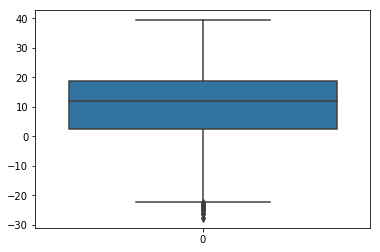

In [27]:
sb.boxplot(data=df['x'])

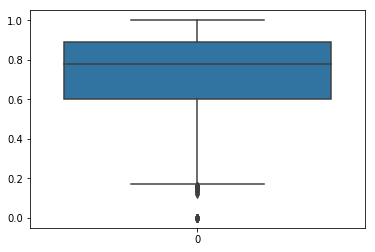

In [28]:
sb.boxplot(data=df['y'])

In [29]:
def Handling_missing_data(dataset):
    dataset.replace(np.NaN, dataset.mean(), inplace=True)
    return dataset

/home/admin1/anaconda3/envs/venv/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


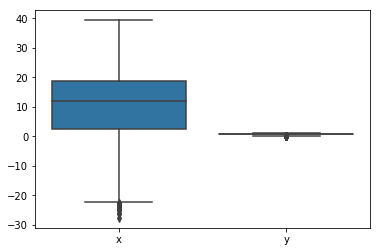

In [30]:
dataset=Handling_missing_data(df)
sb.boxplot(data=dataset)

In [31]:
# def remove_outlier(df):
#     low = .05
#     high = .95
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if ptypes.is_numeric_dtype(df[name]):
#             df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
#     return df


In [32]:
# df= remove_outlier(df)
# sb.boxplot(df)


In [33]:
# feature variable
# target = df['x']
# print ('Skewness is', target.skew())
# target = (np.sqrt((df['x'])))
# print("Mean is",target.mean(), ", Median is ", target.median(), "\nwhich shows that column data are skewed data")
# df.hist()
# df['x'] = target

In [34]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [35]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [36]:
df = Feature_Scaling(df)
# print(df)

/home/admin1/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
#         print(test)
        
    return train,test

In [38]:
train,test = Split(df)

train_data=df.head(train)
test_data=df.tail(test)
       
# print("train data\n",train_data)
# print("test data\n",test_data)

In [45]:
class Linear_Regression:
    def __init__(self):
        # loads csv file
        self.alpha = 0.001
        self.epoch = 1000
        
    def Gradient_Descent(self, train_x_data, train_y_data):
        h1 = 0
        h2 = 0
        theta0 = 0.5
        theta1 = 0.5
        lists=[]
        for length in range(self.epoch):l 
            data=np.random.shuffle(train_x_data)
            
            for i in range(len(data)):
                hypothesis = theta0 + (theta1 * train_x_data[i])
                h1 += (hypothesis - train_y_data[i])
                h2 += ((hypothesis - train_y_data[i]) * train_x_data[i])
            theta0 = theta0 - ((self.alpha * h1) / len(train_x_data))
            theta1 = theta1 - ((self.alpha * h2) / len(train_x_data))
            value=theta0
            lists.append(value)
            
        return [theta0, theta1],lists

    def Test_data(self, test_x_data, list1):
        n = len(test_x_data)
        y_predict = [0] * n
        vector = np.ones(n)
        for i in range(n):
            y_predict[i] = (list1[0] + (list1[1] * test_x_data[i]))
        return y_predict
    
    def accuracy(self, y_test_data, y_predict):
        total_error = 0
        for i in range(0, len(y_test_data)):
            total_error += abs((y_predict[i] - y_test_data[i]) / y_test_data[i])
        total_error = (total_error / len(y_test_data))
        accuracy = 1 - total_error
        return accuracy * 100
    

def main():
    obj = Linear_Regression()
    # calling method by class object
    list1 = []
    
    x_train_data = np.array(train_data["x"])
    y_train_data = np.array(train_data["y"])

    x_test_data = np.array(test_data["x"])
    y_test_data = np.array(test_data["y"])
    
    
    list1,lists = obj.Gradient_Descent(x_train_data, y_train_data)
    y_predict = obj.Test_data(x_test_data, list1)
    acc = obj.accuracy(y_test_data, y_predict)
    print("accuracy is", acc)

if __name__ == '__main__':
    main()
    

<class 'NoneType'>


TypeError: object of type 'NoneType' has no len()